In [1]:
from calitp.tables import tbl
from calitp import query_sql
import calitp.magics
import branca

import shared_utils
import utils

from siuba import *
import pandas as pd
import geopandas as gpd
import shapely

import datetime as dt
import time
from zoneinfo import ZoneInfo

import rt_analysis as rt
import importlib

importlib.reload(utils)
importlib.reload(rt)

import gcsfs
fs = gcsfs.GCSFileSystem()

from tqdm import tqdm_notebook
from tqdm.notebook import trange, tqdm

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
E0321 18:13:43.999510364    1006 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
E0321 18:13:54.683555177    1006 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies


In [ ]:
import seaborn as sns

In [ ]:
metro_end = gpd.read_parquet('./endpoint_delay_views/182_02_08_pm_peak.parquet')
metro_end = metro_end >> filter(_.arrival_hour >= 6, _.arrival_hour <= 22)

In [ ]:
metro_seg = gpd.read_parquet('./segment_speed_views/182_02_08_pm_peak.parquet')

In [ ]:
metro_seg

In [21]:
wilshire_wb = metro_seg >> filter(_.route_id == '720-13153', _.direction_id == '0')

In [22]:
sns.set(rc = {'figure.figsize':(10,6)})

Text(0.5, 1.0, 'LA Metro 720 PM Peak Eastbound Speeds (all segments)')

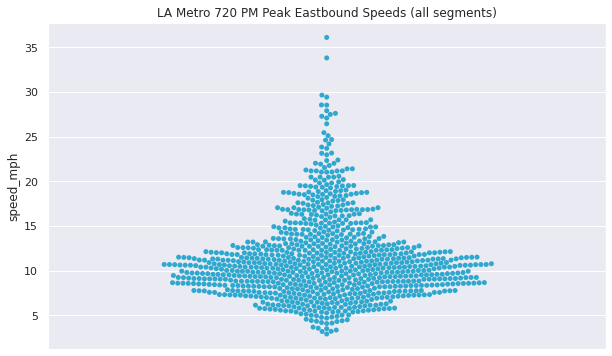

In [23]:
sns.swarmplot(y=wilshire_wb.speed_mph, palette=shared_utils.calitp_color_palette.CALITP_CATEGORY_BRIGHT_COLORS,
             size=5).set_title('LA Metro 720 PM Peak Eastbound Speeds (all segments)')

In [24]:
sns.set(rc = {'figure.figsize':(18,9)})

Text(0.5, 1.0, 'LA Metro 720 PM Peak Eastbound Speeds by Stop Segment')

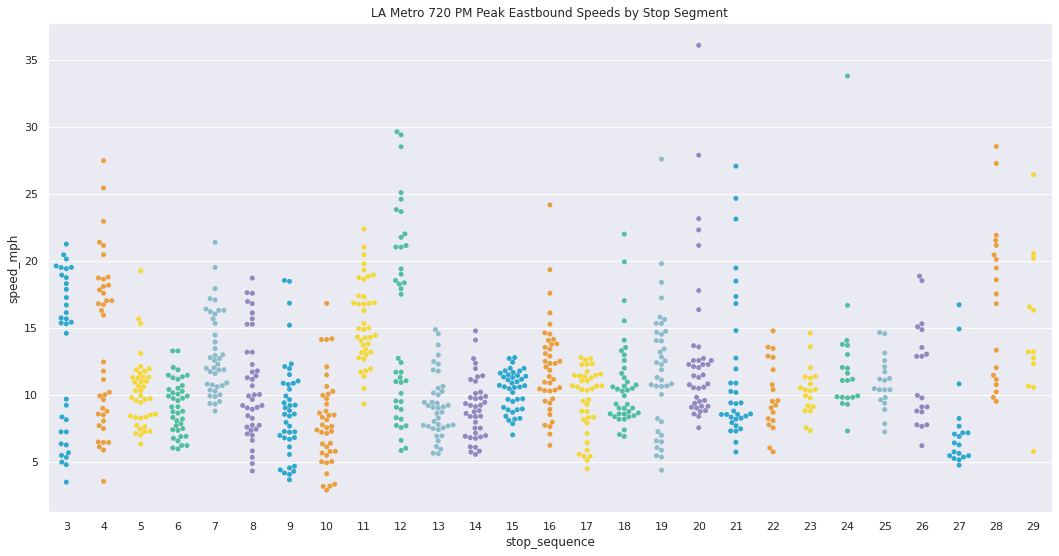

In [25]:
sns.swarmplot(x= wilshire_wb.stop_sequence,y=wilshire_wb.speed_mph,
              palette=shared_utils.calitp_color_palette.CALITP_CATEGORY_BRIGHT_COLORS,
             ).set_title('LA Metro 720 PM Peak Eastbound Speeds by Stop Segment')

In [27]:
sdmts_seg = gpd.read_parquet('./segment_speed_views/278_02_17_pm_peak.parquet')

In [28]:
_7_eb = sdmts_seg >> filter(_.route_id == '7', _.direction_id == '0')

In [ ]:
sns.set(rc = {'figure.figsize':(13,6)})

In [30]:
_7_eb = _7_eb.rename(columns={'speed_mph': 'Segement Speed (mph)',
                               'stop_sequence': 'Stop Segment ID'})

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


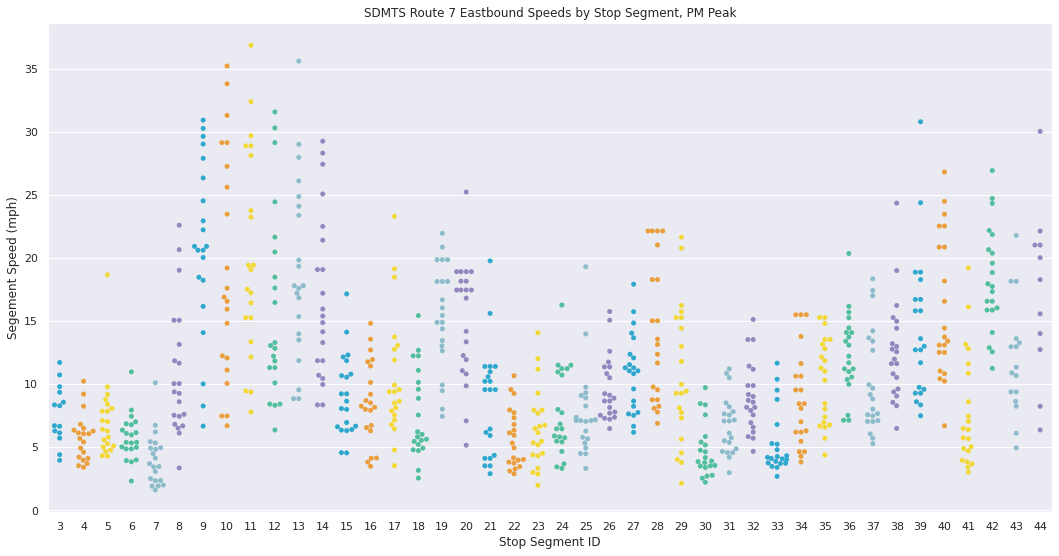

In [31]:
plt = sns.swarmplot(x = _7_eb['Stop Segment ID'], y=_7_eb['Segement Speed (mph)'],
              palette=shared_utils.calitp_color_palette.CALITP_CATEGORY_BRIGHT_COLORS,
             ).set_title('SDMTS Route 7 Eastbound Speeds by Stop Segment, PM Peak')